<a href="https://colab.research.google.com/github/lucaCosca/JetNet_ML-Final-Project/blob/main/JetNet_DeepNeuralNetwork_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data import (local)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

Y_Data = np.load('Y_N70000_lpx50_gqtwz.npz')['arr_0'][:,0]
X_Data = np.load('X_N70000_lpx50_gqtwz.npz')['arr_0']

data_args={"jet_type": ["g", "q", "t", "w", "z"]}

## Data import (file)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import gdown

Y_link = "https://drive.google.com/uc?id=1P4SYbafssKz-6oPXjqTD7aBiCawQjHEk"
X_link = "https://drive.google.com/uc?id=1S_QInod3zyO8Vj-YGQfuM1eVPnwiIeRX"
Y_name = "Y01_with_mass.npz"
X_name = "X01.npz"

gdown.download(Y_link, Y_name, quiet=False)
gdown.download(X_link, X_name, quiet=False)

Y_Data = np.load('Y01_with_mass.npz')['arr_0'][:,0]
X_Data = np.load('X01.npz')['arr_0']

data_args={"jet_type": ["g", "q", "t", "w", "z"]}

ModuleNotFoundError: No module named 'gdown'

## Data import (dataset)

In [ ]:
pip install jetnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.1/865.1 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 637.7/637.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.7/192.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.8/700.8 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.5/467.5 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.3/362.3 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.2/502.2 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
from jetnet.datasets import JetNet
from jetnet.utils import to_image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

class DataLoader:
  def __init__(self):
    pass

  def get_original_data(num_images=70000, LAST=False):
    ''' DOWNLOAD DATA '''
    #set args to load the data
    data_args = {
        "jet_type": ["g", "q", "t", "w", "z"],
        # ‘g’ (gluon), ‘q’ (light quarks), ‘t’ (top quarks), ‘w’ (W bosons), or ‘z’ (Z bosons)
        "data_dir": "datasets/jetnet",
        # only selecting the kinematic features
        "particle_features": ["etarel", "phirel", "ptrel"],
        "num_particles": 30,
        "jet_features": ["type"],
        "download": True,
        "split": "all",
    }

    # download as numpy arrays
    particle_data, jet_data = JetNet.getData(**data_args)

    if LAST == True:
      X_train = particle_data[-num_images:]
      Y_train = jet_data[-num_images:]
    else:
      X_train = particle_data[:num_images]
      Y_train = jet_data[:num_images]

    return X_train, Y_train

  def get_original_data_onehot(train=42000, valid=14000, test=14000):
    X_Data, Y_Data = DataLoader.get_original_data(num_images=train+valid)
    # data split
    X_train, X_val = X_Data[:train], X_Data[train:]
    Y_train, Y_val = Y_Data[:train], Y_Data[train:]

    X_test, Y_test = DataLoader.get_data(test, LAST=True)

    # one hot encoding the lables
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    Y_train_onehot = one_hot_encoder.fit_transform(Y_train.reshape((-1,1)))
    Y_valid_onehot = one_hot_encoder.fit_transform(Y_val.reshape((-1,1)))
    Y_test_onehot = one_hot_encoder.fit_transform(Y_test.reshape((-1,1)))

    return X_train, X_val, X_test, Y_train_onehot, Y_valid_onehot, Y_test_onehot

  def get_data(num_images=70000, LAST=False, SAVE = False):
    ''' DOWNLOAD DATA '''
    #set args to load the data
    data_args = {
        "jet_type": ["g", "q", "t", "w", "z"],
        # ‘g’ (gluon), ‘q’ (light quarks), ‘t’ (top quarks), ‘w’ (W bosons), or ‘z’ (Z bosons)
        "data_dir": "datasets/jetnet",
        # only selecting the kinematic features
        "particle_features": ["etarel", "phirel", "ptrel"],
        "num_particles": 30,
        "jet_features": ["type"],
        "download": True,
        "split": "all",
    }

    # download as numpy arrays
    particle_data, jet_data = JetNet.getData(**data_args)

    ''' TRANSFORM TO IMAGES '''
    #num_images = 70000 #total number of images
    im_size = 50 #pixel size of the length of the image
    maxR=0.4 #maximum radius of the jet
    if LAST == True:
      X_train = np.array( [to_image(particle_data[88000 - num_images + i], im_size, maxR=maxR) for i in range(num_images)] )
      Y_train = jet_data[-num_images:]
    else:
      X_train = np.array( [to_image(particle_data[i], im_size, maxR=maxR) for i in range(num_images)] )
      Y_train = jet_data[:num_images]

    if SAVE and LAST:
      np.savez("X_test_N" + str(num_images) + "_lpx" + str(im_size) + "_gqtwz", X_train)
      np.savez("Y_test_N" + str(num_images) + "_lpx" + str(im_size) + "_gqtwz", Y_train)
    elif SAVE:
      np.savez("X_N" + str(num_images) + "_lpx" + str(im_size) + "_gqtwz", X_train)
      np.savez("Y_N" + str(num_images) + "_lpx" + str(im_size) + "_gqtwz", Y_train)

    return X_train, Y_train

  def get_data_onehot(train=42000, valid=14000, test=14000, SAVE = False):
    X_Data, Y_Data = DataLoader.get_data(train+valid, SAVE = SAVE)
    # data split
    X_train, X_val = X_Data[:train], X_Data[train:]
    Y_train, Y_val = Y_Data[:train], Y_Data[train:]

    X_test, Y_test = DataLoader.get_data(test, LAST=True, SAVE = SAVE)

    # one hot encoding the lables
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    Y_train_onehot = one_hot_encoder.fit_transform(Y_train.reshape((-1,1)))
    Y_valid_onehot = one_hot_encoder.fit_transform(Y_val.reshape((-1,1)))
    Y_test_onehot = one_hot_encoder.fit_transform(Y_test.reshape((-1,1)))

    return X_train, X_val, X_test, Y_train_onehot, Y_valid_onehot, Y_test_onehot

In [6]:
# test
X_train, X_val, X_test, Y_train_onehot, Y_valid_onehot, Y_test_onehot = DataLoader.get_original_data_onehot(train=700000, valid=90000, test=90000)

## Model eval class

In [61]:
class ModelEval:
  def __init__(self, model, X_valid_set, Y_valid_set, model_str="model", cmap='inferno'):
    self.X_valid = X_valid_set
    self.Y_valid = Y_valid_set
    self.cmap = cmap
    self.model_str = model_str
    self.model = model
    self.dict_labels = {'g': "gluon", "q": "light quarks", "t": "top quarks", "w": "W bosons", "z": "Z bosons"}
    self.array_labels = ["gluon", "light quarks", "top quark", "W boson", "Z boson"]

    self.Y_valid_pred = self.model.predict(self.X_valid)
    self.Y_valid_pred_classes = np.argmax(self.Y_valid_pred, axis=1)
    self.Y_valid_classes = np.argmax(self.Y_valid, axis=1)

  def return_predictions(self):
    return self.Y_valid_pred, self.Y_valid_pred_classes, self.Y_valid_classes

  def confusion_matrix(self):
    from sklearn.metrics import confusion_matrix
    conf_m = confusion_matrix(self.Y_valid_classes, self.Y_valid_pred_classes)
    print("Confusion matrix of " + self.model_str)
    print(conf_m)
    plt.matshow(conf_m, cmap=self.cmap)
    plt.title("Confusion matrix of " + self.model_str)
    plt.xlabel("Predicted class")
    plt.ylabel("True class")
    plt.xticks(range(5), self.array_labels)
    plt.yticks(range(5), self.array_labels)

  def PR_study_multiclass(self):
    from sklearn.metrics import average_precision_score, precision_recall_curve
    # Precision-Recall analysis for each class
    average_precision = dict()
    PR_curve = []
    for i in range(5):
        PR_curve.append( precision_recall_curve(self.Y_valid[:,i], self.Y_valid_pred[:, i]) )
        average_precision[i] = average_precision_score(self.Y_valid[:,i], self.Y_valid_pred[:, i])
        plt.plot(PR_curve[i][1], PR_curve[i][0], label='{0} (area = {1:0.2f})'.format(self.array_labels[i], average_precision[i]))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Model: " + self.model_str)
    plt.legend()
    plt.show()

  def ROC_curve(self):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score

    for i in range(5):
      fpr, tpr, thresholds = roc_curve(self.Y_valid[:,i], self.Y_valid_pred[:, i])
      plt.plot(fpr, tpr, linewidth=2, label='{0} (area = {1:0.2f})'.format(self.array_labels[i], round(roc_auc_score(self.Y_valid[:,i], self.Y_valid_pred[:, i]), 5)))

    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.grid(1)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

## Max distribution

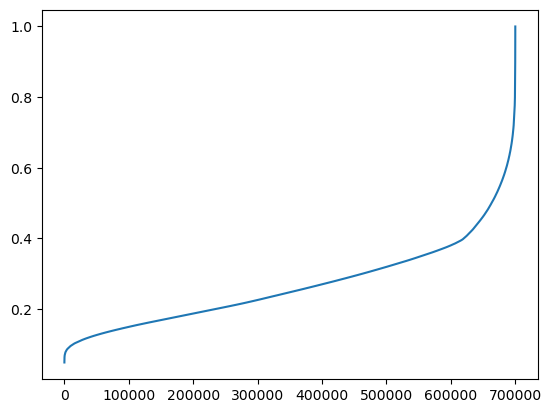

In [9]:
max_values = np.sort([np.max(X_train[i]) for i in range(len(X_train))])
plt.plot(max_values)
plt.show()

## Model 1: Deep Neural network, standard loss

In [16]:
import pandas as pd
import tensorflow as tf

model0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [30,3]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax'),
])

In [17]:
model0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         4,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           155 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,605 (29.71 KB)

 Trainable params: 7,385 (28.85 KB)

 Non-trainable params: 220 (880.00 B)

In [68]:
model0.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['categorical_accuracy'],
)

def learning_rate_eval(lr, epoch):
  if epoch < 5:
    return 0.1
  else :
    return float(lr * 0.8)

lr_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_eval)


history = model0.fit(
    X_train, Y_train_onehot,
    batch_size = 64,
    epochs = 30,
    callbacks=[lr_callback],
    validation_data = (X_val, Y_valid_onehot)
)

Epoch 1/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 12s 887us/step - categorical_accuracy: 0.5177 - loss: 1.1875 - val_categorical_accuracy: 0.5240 - val_loss: 1.1467 - learning_rate: 0.1000
Epoch 2/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - categorical_accuracy: 0.5187 - loss: 1.1865 - val_categorical_accuracy: 0.5211 - val_loss: 1.1474 - learning_rate: 0.1000
Epoch 3/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 10s 951us/step - categorical_accuracy: 0.5189 - loss: 1.1878 - val_categorical_accuracy: 0.4992 - val_loss: 1.2491 - learning_rate: 0.1000
Epoch 4/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 10s 917us/step - categorical_accuracy: 0.5191 - loss: 1.1865 - val_categorical_accuracy: 0.4887 - val_loss: 1.1995 - learning_rate: 0.1000
Epoch 5/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 9s 798us/step - categorical_accuracy: 0.5205 - loss: 1.1829 - val_categorical_accuracy: 0.5121 - val_loss: 1.1438 - learning_rate: 0.1000
Epoch 6/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - categorical_accuracy: 0.5202 

## Model 1 results

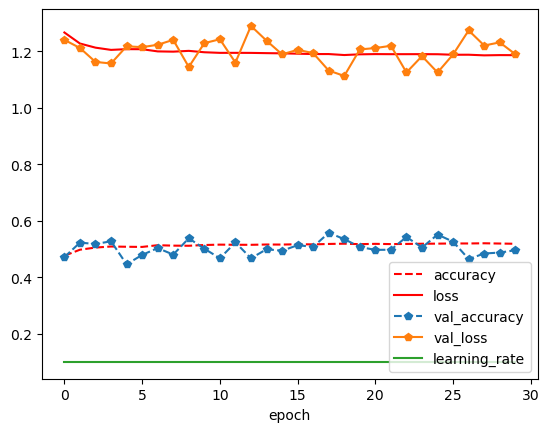

In [19]:
h = pd.DataFrame(history.history)
h.plot(xlabel = "epoch", style = ["r--","r-","p--","p-"])
plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step
Confusion matrix of DNN 50+30+30 neurons
[[13182  1448  1646   373  1479]
 [ 5657  9425   638   687  1066]
 [ 2319   160 10801  1347  3577]
 [ 6713  1741    23  9472   227]
 [ 4562  1233    28 10493  1703]]


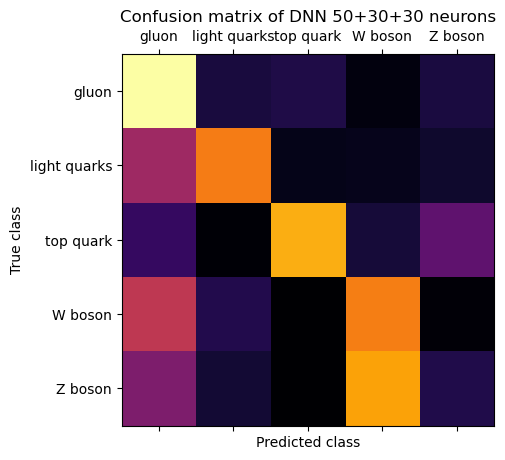

In [62]:
m = ModelEval(model0, X_val, Y_valid_onehot, model_str="DNN 50+30+30 neurons")
m.confusion_matrix()

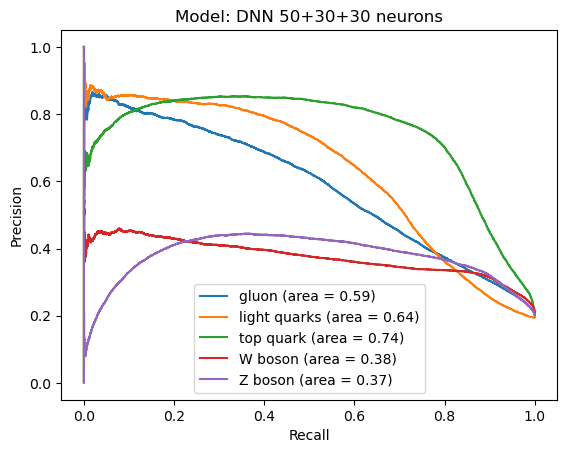

In [63]:
m.PR_study_multiclass()

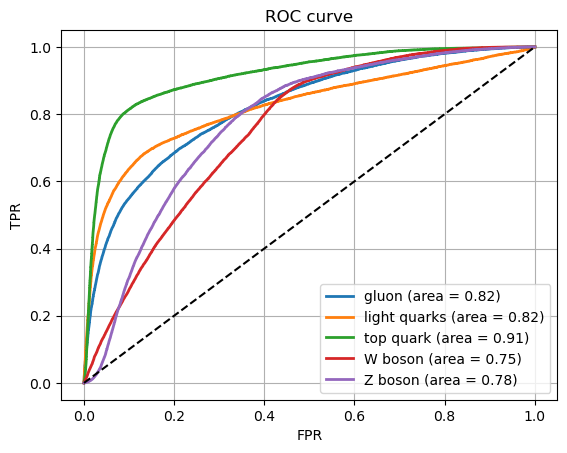

In [64]:
m.ROC_curve()

## Model 2: Deep Neural network, EDM loss

In [41]:
import pandas as pd
import tensorflow as tf

N = 200

model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [30,3]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(N, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(N, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(N, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(N, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax'),
])

In [42]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 200)            │        18,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 5)              │         1,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,005 (558.61 KB)

 Trainable params: 141,405 (552.36 KB)

 Non-trainable params: 1,600 (6.25 KB)

In [43]:
import jetnet

model2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    #loss = jetnet.losses.EMDLoss(qpth_l2_strength = 0.0001, device="cuda", num_particles=30),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy'],
)

def learning_rate_eval(lr, epoch):
  LR = 0.01
  if epoch < 5:
    return LR
  else :
    return LR * np.exp(-(epoch-5)/10)

lr_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_eval)


history2 = model2.fit(
    X_train, Y_train_onehot,
    batch_size = 64,
    epochs = 30,
    callbacks=[lr_callback],
    validation_data = (X_val, Y_valid_onehot)
)

Epoch 1/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.5102 - loss: 1.2057 - val_accuracy: 0.4469 - val_loss: 1.3050 - learning_rate: 0.0100
Epoch 2/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.5590 - loss: 1.0999 - val_accuracy: 0.5056 - val_loss: 1.2125 - learning_rate: 0.0100
Epoch 3/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 10s 911us/step - accuracy: 0.5661 - loss: 1.0830 - val_accuracy: 0.5099 - val_loss: 1.1586 - learning_rate: 0.0100
Epoch 4/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 11s 1000us/step - accuracy: 0.5690 - loss: 1.0765 - val_accuracy: 0.4743 - val_loss: 1.2347 - learning_rate: 0.0100
Epoch 5/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.5742 - loss: 1.0694 - val_accuracy: 0.4884 - val_loss: 1.1992 - learning_rate: 0.0100
Epoch 6/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.5771 - loss: 1.0617 - val_accuracy: 0.4541 - val_loss: 1.2892 - learning_rate: 0.0100
Epoch 7/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/s

## Model 2: results

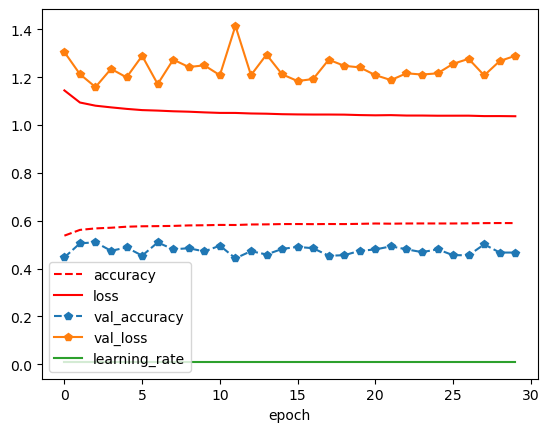

In [44]:
h = pd.DataFrame(history2.history)
h.plot(xlabel = "epoch", style = ["r--","r-","p--","p-"])
plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 931us/step
Confusion matrix of DNN 3x200 neurons
[[13517  1411  1046  1309   845]
 [ 5208  9833   391  1382   659]
 [ 3150   248  9475  2721  2610]
 [ 6125  2904    18  9091    38]
 [ 3425  1415    29 13032   118]]


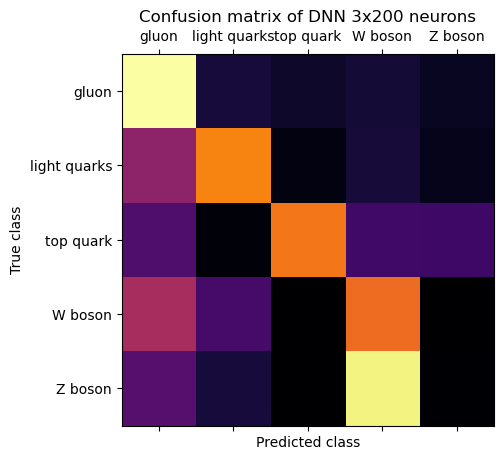

In [65]:
m2 = ModelEval(model2, X_val, Y_valid_onehot, model_str="DNN 3x200 neurons")
m2.confusion_matrix()

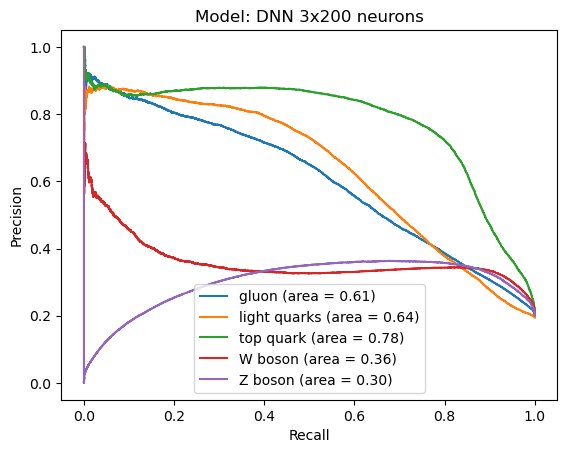

In [66]:
m2.PR_study_multiclass()

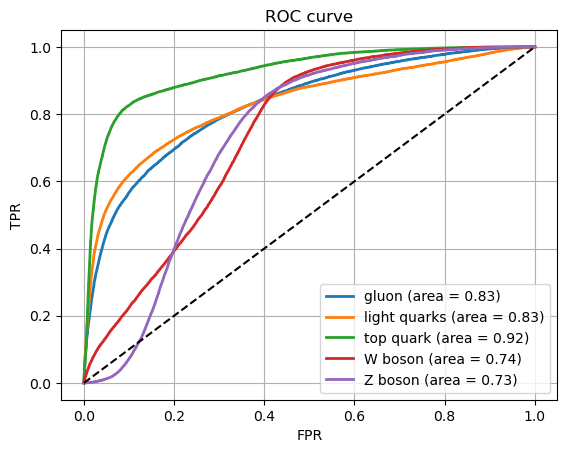

In [67]:
m2.ROC_curve()